In [2]:
import pandas as pd
df = pd.read_csv('respiratory symptoms and treatment.csv')
df.head(10)

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5.0,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,high
2,wheezing,6.0,male,Asthma,Mepolizumab,high
3,shortness of breath,7.0,male,Asthma,Mepolizumab,high
4,shortness of breath,9.0,male,Asthma,Mepolizumab,high
5,tight feeling in the chest,NaN,male,Asthma,Mepolizumab,high
6,shortness of breath,NaN,male,Asthma,Mepolizumab,high
7,tight feeling in the chest,8.0,female,Asthma,Mepolizumab,high
8,shortness of breath,36.0,female,Asthma,Mepolizumab,medium
9,wheezing,40.0,female,Asthma,Omalizumab,medium


In [3]:
df.drop(columns='Treatment',inplace=True)

In [4]:
df

,Symptoms,Age,Sex,Disease,Nature
0,coughing,5.0,female,Asthma,high
1,tight feeling in the chest,4.0,female,Asthma,high
2,wheezing,6.0,male,Asthma,high
3,shortness of breath,7.0,male,Asthma,high
4,shortness of breath,9.0,male,Asthma,high
...,...,...,...,...,...
38532,A cough that lasts more than three weeks,45.0,female,Tuberculosis,high
38533,Loss of appetite and unintentional weight loss,43.0,female,Tuberculosis,high
38534,Fever,41.0,female,Tuberculosis,high
38535,Chills,53.0,female,Tuberculosis,high


In [5]:

import regex as re

# Normalize the 'Symptoms' column
def normalize_symptom(symptom):
    if isinstance(symptom, str):  # Only apply if it's a string
        symptom = symptom.lower()
        symptom = symptom.strip()
        symptom = re.sub(r'\s+', ' ', symptom)
         # Normalize whistling sound variants
        if "whistling sound" in symptom:
            return "whistling sound while breathing"
        return symptom
    return symptom  # Leave float/NaN untouched

df['Symptoms'] = df['Symptoms'].apply(normalize_symptom)

# Show unique cleaned symptoms
unique_symptoms = df['Symptoms'].unique()
len(unique_symptoms),unique_symptoms

(77,
 array(['coughing', 'tight feeling in the chest', 'wheezing',
        'shortness of breath', 'fever', 'cold', 'allergy',
        'coughing up yellow or green mucus daily',
        'shortness of breath that gets worse during flare-ups',
        'fatigue, feeling run-down or tired', 'chest pain',
        'whistling sound while breathing', 'coughing up blood',
        'runny nose', 'stuffy nose', 'loss of appetite', 'cough',
        'low-grade fever', 'chest congestion', 'yellow cough',
        'feeling run-down or tired', 'mucus', nan, 'chronic cough',
        'fatigue', 'lower back pain', 'dry cough', 'greenish cough',
        'cough with blood', 'sweating', 'shaking', 'rapid breathing',
        'shallow breathing', 'low energy', 'nausea', 'vomiting',
        'sharp chest pain', 'bluish skin', 'rapid heartbeat', 'high fever',
        'headache', 'muscle aches', 'joint pain', 'chills', 'sore throat',
        'nasal congestion', 'diarrhea', 'breath', 'dizziness', 'fainting',
        

In [6]:
symptom_dummies = pd.get_dummies(df['Symptoms'])
symptom_dummies


,a cough that lasts more than three weeks,"a dry, crackling sound in the lungs while breathing in",allergy,bluish skin,breath,chest congestion,chest pain,chest tightness or chest pain,chills,chronic cough,...,tight feeling in the chest,unusual moodiness,vomiting,weight loss,weight loss from loss of appetite,wheezing,wheezing cough,whistling sound while breathing,wider and rounder than normal fingertips and toes,yellow cough
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38532,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38533,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38534,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38535,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
symptom_dummies.columns

Index(['a cough that lasts more than three weeks',
       'a dry, crackling sound in the lungs while breathing in', 'allergy',
       'bluish skin', 'breath', 'chest congestion', 'chest pain',
       'chest tightness or chest pain', 'chills', 'chronic cough', 'cold',
       'cough', 'cough with blood', 'coughing', 'coughing up blood',
       'coughing up yellow or green mucus daily', 'daytime sleepiness',
       'diarrhea', 'difficulties with memory and concentration', 'distressing',
       'dizziness', 'dry cough', 'dry mouth', 'edema', 'fainting',
       'faster heart beating', 'fatigue', 'fatigue, feeling run-down or tired',
       'feeling run-down or tired', 'fever', 'frequently waking',
       'greenish cough', 'headache', 'heart palpitations', 'high fever',
       'irritability', 'joint pain', 'loss of appetite',
       'loss of appetite and unintentional weight loss', 'low energy',
       'low-grade fever', 'lower back pain', 'morning headaches', 'mucus',
       'muscle aches',

In [7]:

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_nature = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'].astype(str))
df['Nature'] = le_nature.fit_transform(df['Nature'].astype(str))

# -feature matrix X and target y 
X = pd.concat([df[['Age', 'Sex', 'Nature']], symptom_dummies], axis=1)
y = df['Disease']

df_model = pd.concat([X, y], axis=1).dropna()
X = df_model.drop(columns='Disease')
y = df_model['Disease']


In [8]:
df_model

,Age,Sex,Nature,a cough that lasts more than three weeks,"a dry, crackling sound in the lungs while breathing in",allergy,bluish skin,breath,chest congestion,chest pain,...,unusual moodiness,vomiting,weight loss,weight loss from loss of appetite,wheezing,wheezing cough,whistling sound while breathing,wider and rounder than normal fingertips and toes,yellow cough,Disease
0,5.0,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Asthma
1,4.0,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Asthma
2,6.0,1,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,Asthma
3,7.0,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Asthma
4,9.0,1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Asthma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38532,45.0,0,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Tuberculosis
38533,43.0,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Tuberculosis
38534,41.0,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Tuberculosis
38535,53.0,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Tuberculosis


In [15]:
df2 = pd.read_csv(r'C:\Users\cbour\Downloads\resp\Respiratory_Sound_Database\Respiratory_Sound_Database\demographic_info_with_disease_and_sounds.csv')

In [23]:
df2_cleaned = df2[['Age', 'Gender', 'Disease', 'Crackles', 'Wheezes']].copy()
df2_cleaned.rename(columns={'Gender': 'Sex'}, inplace=True)
df2_cleaned['Sex'] = le_sex.fit_transform(df2_cleaned['Sex'])



In [24]:
df_model['Wheezes']=0
df_model['Crackles']=0

In [25]:
df_combined = pd.concat([df_model, df2_cleaned], ignore_index=True)
df_combined

,Age,Sex,Nature,a cough that lasts more than three weeks,"a dry, crackling sound in the lungs while breathing in",allergy,bluish skin,breath,chest congestion,chest pain,...,weight loss,weight loss from loss of appetite,wheezing,wheezing cough,whistling sound while breathing,wider and rounder than normal fingertips and toes,yellow cough,Disease,Wheezes,Crackles
0,5.00,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
1,4.00,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
2,6.00,1,1.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Asthma,0,0
3,7.00,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
4,9.00,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38024,60.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COPD,1,1
38025,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COPD,1,1
38026,10.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy,0,0
38027,0.83,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy,0,0


In [26]:
#filling NaN symptom columns with 0s
non_symptom_cols = ['Age', 'Sex', 'Disease', 'Nature', 'Crackles', 'Wheezes']


df_combined= df_combined.copy()
symptom_cols = [col for col in df_combined.columns if col not in non_symptom_cols]
df_combined[symptom_cols] = df_combined[symptom_cols].fillna(0)

In [27]:
y = df_combined['Disease']
y.value_counts()

Disease
Pneumonia                                6150
bronchitis                               4925
chronic obstructive pulmonary disease    3888
Mesothelioma                             3168
Pneumothorax                             2880
bronchiolitis                            2600
Chronic Bronchitis                       2016
Bronchiectasis                           1907
Influenza                                1872
Pulmonary hypertension                   1680
Tuberculosis                             1680
Asthma                                   1023
Chronic cough                             912
sleep apnea                               864
Respiratory syncytial virus               720
Acute Respiratory Distress Syndrome       696
Aspergillosis                             504
Asbestosis                                432
COPD                                       64
Healthy                                    26
URTI                                       14
Bronchiolitis             

In [29]:
df_combined

,Age,Sex,Nature,a cough that lasts more than three weeks,"a dry, crackling sound in the lungs while breathing in",allergy,bluish skin,breath,chest congestion,chest pain,...,weight loss,weight loss from loss of appetite,wheezing,wheezing cough,whistling sound while breathing,wider and rounder than normal fingertips and toes,yellow cough,Disease,Wheezes,Crackles
0,5.00,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
1,4.00,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
2,6.00,1,1.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Asthma,0,0
3,7.00,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
4,9.00,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38024,60.00,1,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,COPD,1,1
38025,NaN,2,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,COPD,1,1
38026,10.00,0,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Healthy,0,0
38027,0.83,1,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Healthy,0,0


In [30]:
df_combined['Nature'] = df_combined['Nature'].fillna(1.0)


In [31]:
len(df_combined),len(df_combined.dropna())

(38029, 38028)

In [32]:
df_combined.dropna(inplace=True)

In [33]:
df_combined.to_csv('df_combined_all.csv')

In [35]:
y = df_combined['Disease']
X= df_combined.drop(columns=['Disease'])

In [43]:
X

,Age,Sex,Nature,a cough that lasts more than three weeks,"a dry, crackling sound in the lungs while breathing in",allergy,bluish skin,breath,chest congestion,chest pain,...,vomiting,weight loss,weight loss from loss of appetite,wheezing,wheezing cough,whistling sound while breathing,wider and rounder than normal fingertips and toes,yellow cough,Wheezes,Crackles
0,5.00,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
1,4.00,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
2,6.00,1,1.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,0,0
3,7.00,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
4,9.00,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38023,74.00,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
38024,60.00,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
38026,10.00,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38027,0.83,1,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)# stratification

# balanced weight
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9445174861951091
                                       precision    recall  f1-score   support

  Acute Respiratory Distress Syndrome       1.00      1.00      1.00       139
                           Asbestosis       0.78      1.00      0.88        86
                        Aspergillosis       0.80      1.00      0.89       101
                               Asthma       0.83      0.89      0.86       205
                       Bronchiectasis       0.90      0.97      0.94       382
                        Bronchiolitis       0.00      0.00      0.00         1
                                 COPD       0.92      0.85      0.88        13
                   Chronic Bronchitis       0.89      0.92      0.91       403
                        Chronic cough       0.77      1.00      0.87       182
                              Healthy       0.50      0.60      0.55         5
                            Influenza       1.00      1.00      1.00       374
                      

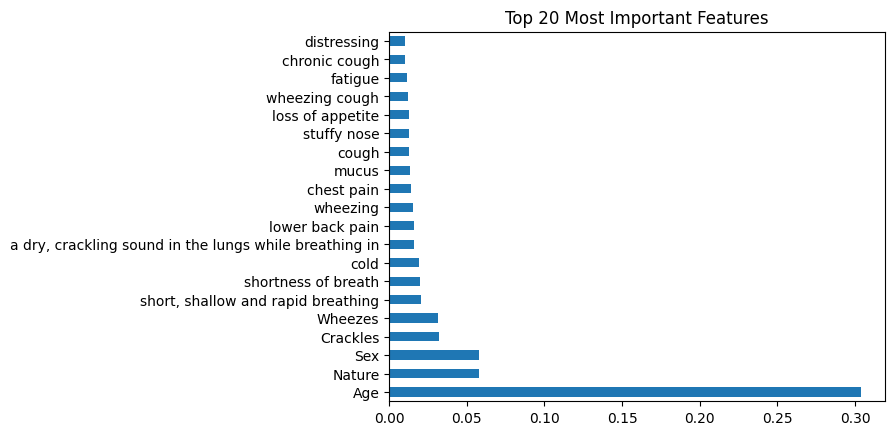

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Most Important Features")
plt.show()

In [41]:
import numpy as np

def predict_disease(user_input, clf, le_sex, le_nature, all_symptom_columns):
    features = {
        "Age": user_input["Age"],
        "Sex": le_sex.transform([user_input["Sex"]])[0],
        "Nature": le_nature.transform([user_input["Nature"]])[0]
    }
    
    for symptom in all_symptom_columns:
        features[symptom] = 0
    
    for s in user_input["Symptoms"]:
        col_name = s.strip().lower()
        if col_name in symptom_dummies.columns:
            features[col_name] = 1
    
    input_df = pd.DataFrame([features])
    
    prediction = clf.predict(input_df)[0]
    prediction_proba = clf.predict_proba(input_df)[0]
    top_3_idx = np.argsort(prediction_proba)[::-1][:3]
    top_3 = [(clf.classes_[i], prediction_proba[i]) for i in top_3_idx]
    
    return {
        "Top Prediction": prediction,
        "Top 3 Predictions": top_3
    }


In [49]:
# option 1 - extract symptoms from text(simple extraction)
def extract_symptoms_from_text(text, symptom_columns):
    found_symptoms = []
    text = text.lower()

    for symptom in symptom_columns:
        clean_symptom = symptom.replace("symptom_", "").lower().strip()
        
        # Exact match or regex word boundary match
        if re.search(r'\b' + re.escape(clean_symptom) + r'\b', text):
            found_symptoms.append(clean_symptom)

    return found_symptoms

In [50]:
note = "Patient presents with fatigue, low energy and a persistent dry cough. Breathing is shallow."

matched = extract_symptoms_from_text(note, symptom_dummies.columns)
print(matched)

['cough', 'dry cough', 'fatigue', 'low energy', 'persistent dry cough']


In [52]:
user_input = {
    "Age": 45,
    "Sex": "0",
    "Nature": "high",
    "Symptoms": matched
}

result = predict_disease(user_input, clf, le_sex, le_nature, all_symptom_columns=symptom_dummies.columns)
print(result)

ValueError: y contains previously unseen labels: '0'

In [53]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
df_cleaned = df_combined.copy()

# Convert 'True'/'False' in symptom columns to 1/0
symptom_cols = df_cleaned.columns.difference(['Age', 'Sex', 'Nature', 'Disease', 'Crackles', 'Wheezes'])
df_cleaned[symptom_cols] = df_cleaned[symptom_cols].applymap(lambda x: 1 if str(x).strip().lower() == 'true' else 0)

# Fill NaNs in Nature with a placeholder (e.g., "unknown") and encode it
df_cleaned['Nature'] = df_cleaned['Nature'].fillna("unknown").astype(str)
le_nature = LabelEncoder()
df_cleaned['Nature'] = le_nature.fit_transform(df_cleaned['Nature'])

# Fill NaNs in Sex with a placeholder (e.g., "unknown") and encode it
df_cleaned['Sex'] = df_cleaned['Sex'].fillna("unknown").astype(str)
le_sex = LabelEncoder()
df_cleaned['Sex'] = le_sex.fit_transform(df_cleaned['Sex'])

# Drop any remaining NaNs in Age or symptom columns (optional: could also fill Age with mean)
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())

# Prepare X and y
y = df_cleaned['Disease']
X = df_cleaned.drop(columns=['Disease'])

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train classifier with class balancing
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

accuracy, report



C:\Users\cbour\AppData\Local\Temp\ipykernel_49104\3000242333.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[symptom_cols] = df_cleaned[symptom_cols].applymap(lambda x: 1 if str(x).strip().lower() == 'true' else 0)


(0.9445174861951091,
 {'Acute Respiratory Distress Syndrome': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 139.0},
  'Asbestosis': {'precision': 0.7818181818181819,
   'recall': 1.0,
   'f1-score': 0.8775510204081634,
   'support': 86.0},
  'Aspergillosis': {'precision': 0.8015873015873016,
   'recall': 1.0,
   'f1-score': 0.8898678414096917,
   'support': 101.0},
  'Asthma': {'precision': 0.8280542986425339,
   'recall': 0.8926829268292683,
   'f1-score': 0.8591549295774646,
   'support': 205.0},
  'Bronchiectasis': {'precision': 0.9029126213592233,
   'recall': 0.9738219895287958,
   'f1-score': 0.9370277078085644,
   'support': 382.0},
  'Bronchiolitis': {'precision': 0.0,
   'recall': 0.0,
   'f1-score': 0.0,
   'support': 1.0},
  'COPD': {'precision': 0.9166666666666666,
   'recall': 0.8461538461538461,
   'f1-score': 0.8799999999999999,
   'support': 13.0},
  'Chronic Bronchitis': {'precision': 0.8942307692307693,
   'recall': 0.9230769230769231,
   'f1-

In [54]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Manually set class mappings
le_sex = LabelEncoder()
le_sex.classes_ = np.array(['female', 'male'])  # add 'other' if needed

le_nature = LabelEncoder()
le_nature.classes_ = np.array(['high'])  # add 'moderate', 'low' if needed


In [58]:
def predict_disease(user_input, clf, le_sex, le_nature, all_symptom_columns, trained_feature_order):
    # Encode categorical fields
    features = {
        "Age": user_input["Age"],
        "Sex": le_sex.transform([user_input["Sex"]])[0],
        "Nature": le_nature.transform([user_input["Nature"]])[0],
        "Wheezes": user_input.get("Wheezes", 0),
        "Crackles": user_input.get("Crackles", 0)
    }

    # Initialize all symptom columns to 0
    for symptom in all_symptom_columns:
        features[symptom] = 0

    # Mark the reported symptoms
    for s in user_input["Symptoms"]:
        col_name = s.strip().lower()
        if col_name in all_symptom_columns:
            features[col_name] = 1

    # Create DataFrame and reorder columns to match training data
    input_df = pd.DataFrame([features])
    input_df = input_df[trained_feature_order]  # Reorder columns here

    prediction = clf.predict(input_df)[0]
    prediction_proba = clf.predict_proba(input_df)[0]
    top_3_idx = np.argsort(prediction_proba)[::-1][:3]
    top_3 = [(clf.classes_[i], prediction_proba[i]) for i in top_3_idx]

    return {
        "Top Prediction": prediction,
        "Top 3 Predictions": top_3
    }


In [59]:

user_input = {
    "Age": 45,
    "Sex": "female",
    "Nature": "high",
    "Wheezes": 1,
    "Crackles": 0,
    "Symptoms": ["cough", "fatigue", "shortness of breath"]
}

trained_feature_order = X.columns.tolist()  # this is your original training feature order

result = predict_disease(
    user_input,
    clf,
    le_sex,
    le_nature,
    all_symptom_columns=symptom_dummies.columns,
    trained_feature_order=trained_feature_order
)

print(result)


{'Top Prediction': 'Chronic Bronchitis', 'Top 3 Predictions': [('Chronic Bronchitis', 0.34), ('Bronchiectasis', 0.26), ('bronchiolitis', 0.14)]}


In [63]:
cleaned_symptoms = [
    str(s).strip().lower() for s in symptom_dummies.columns if pd.notnull(s)
]

In [67]:
from medspacy.target_matcher import TargetRule

# Convert column names to a cleaned string list
cleaned_symptoms = [
    str(s).strip().lower() for s in list(symptom_dummies.columns) if isinstance(s, str) and s.strip().lower() != "none"
]

# Remove duplicates
cleaned_symptoms = list(set(cleaned_symptoms))

# Create matcher and add rules
matcher = nlp.get_pipe("medspacy_target_matcher")
rules = [TargetRule(symptom, "SYMPTOM") for symptom in cleaned_symptoms]
matcher.add(rules)


In [68]:
for rule in matcher.rules[:10]:
    print(f"✅ Phrase: '{rule.pattern}' → Label: {rule.category}")


✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM
✅ Phrase: 'None' → Label: SYMPTOM


In [69]:
print("SYMPTOM COLUMNS:")
for col in symptom_dummies.columns:
    print(repr(col))

SYMPTOM COLUMNS:
'a cough that lasts more than three weeks'
'a dry, crackling sound in the lungs while breathing in'
'allergy'
'bluish skin'
'breath'
'chest congestion'
'chest pain'
'chest tightness or chest pain'
'chills'
'chronic cough'
'cold'
'cough'
'cough with blood'
'coughing'
'coughing up blood'
'coughing up yellow or green mucus daily'
'daytime sleepiness'
'diarrhea'
'difficulties with memory and concentration'
'distressing'
'dizziness'
'dry cough'
'dry mouth'
'edema'
'fainting'
'faster heart beating'
'fatigue'
'fatigue, feeling run-down or tired'
'feeling run-down or tired'
'fever'
'frequently waking'
'greenish cough'
'headache'
'heart palpitations'
'high fever'
'irritability'
'joint pain'
'loss of appetite'
'loss of appetite and unintentional weight loss'
'low energy'
'low-grade fever'
'lower back pain'
'morning headaches'
'mucus'
'muscle aches'
'nasal congestion'
'nausea'
'night sweats'
'pain'
'pauses in breathing'
'persistent dry coug'
'persistent dry cough'
'rapid breathin

In [60]:
df_combined.head()

,Age,Sex,Nature,a cough that lasts more than three weeks,"a dry, crackling sound in the lungs while breathing in",allergy,bluish skin,breath,chest congestion,chest pain,...,weight loss,weight loss from loss of appetite,wheezing,wheezing cough,whistling sound while breathing,wider and rounder than normal fingertips and toes,yellow cough,Disease,Wheezes,Crackles
0,5.0,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
1,4.0,0,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
2,6.0,1,1.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Asthma,0,0
3,7.0,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0
4,9.0,1,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,Asthma,0,0


In [80]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cbour\AppData\Roaming\nltk_data...


True

In [75]:
import re
def simple_tokenize(text):
    return re.findall(r"\b\w+(?:'\w+)?\b", text.lower())

In [81]:
from nltk.corpus import wordnet as wn

def get_synonyms(term):
    synonyms = set()
    for syn in wn.synsets(term.replace(" ", "_")):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace("_", " "))
    return list(synonyms)

In [82]:

get_synonyms("fatigue")

['wear',
 'outwear',
 'pall',
 'fag out',
 'weariness',
 'wear out',
 'wear down',
 'weary',
 'jade',
 'wear upon',
 'fatigue',
 'fatigue duty',
 'fag',
 'tire out',
 'tiredness',
 'tire']

In [86]:
sympt_dict = {}
for i in symptom_dummies.columns:
    sympt_dict[i] = get_synonyms(i)

In [87]:
sympt_dict

{'a cough that lasts more than three weeks': [],
 'a dry, crackling sound in the lungs while breathing in': [],
 'allergy': ['allergy', 'allergic reaction'],
 'bluish skin': [],
 'breath': ['breathing space',
  'intimation',
  'breathing place',
  'breather',
  'breathing spell',
  'hint',
  'breathing time',
  'breath'],
 'chest congestion': [],
 'chest pain': ['chest pain'],
 'chest tightness or chest pain': [],
 'chills': ['pall',
  'cool',
  'gelidity',
  'shiver',
  'chill',
  'quiver',
  'shudder',
  'shivering',
  'cool down',
  'frisson',
  'iciness',
  'tingle',
  'thrill'],
 'chronic cough': [],
 'cold': ['frigidness',
  'cold-blooded',
  'inhuman',
  'low temperature',
  'coldness',
  'insensate',
  'frigid',
  'cold',
  'stale',
  'frigidity',
  'moth-eaten',
  'common cold',
  'dusty'],
 'cough': ['coughing', 'cough'],
 'cough with blood': [],
 'coughing': ['coughing', 'cough'],
 'coughing up blood': [],
 'coughing up yellow or green mucus daily': [],
 'daytime sleepiness'

In [95]:
all_synonyms = []
sympt_dict.values()
for i in sympt_dict.values():
    for j in i:
        all_synonyms.append(j)
        print(j)

allergy
allergic reaction
breathing space
intimation
breathing place
breather
breathing spell
hint
breathing time
breath
chest pain
pall
cool
gelidity
shiver
chill
quiver
shudder
shivering
cool down
frisson
iciness
tingle
thrill
frigidness
cold-blooded
inhuman
low temperature
coldness
insensate
frigid
cold
stale
frigidity
moth-eaten
common cold
dusty
coughing
cough
coughing
cough
diarrhea
looseness
diarrhoea
looseness of the bowels
disturbing
worrisome
troubling
distressful
sorry
worrying
straiten
distressing
distress
sad
lamentable
deplorable
perturbing
pitiful
giddiness
lightheadedness
dizziness
vertigo
dry mouth
xerostomia
dropsy
edema
oedema
hydrops
faint
swoon
pass out
conk
wear
outwear
pall
fag out
weariness
wear out
wear down
weary
jade
wear upon
fatigue
fatigue duty
fag
tire out
tiredness
tire
feverishness
febricity
febrility
fever
pyrexia
vexation
headache
concern
cephalalgia
worry
head ache
snappishness
fussiness
crossness
fretfulness
peevishness
surliness
choler
biliousness


In [97]:
len(all_synonyms)

200

In [92]:
df_model.to_csv("df_symp_expanded.csv", index=False)

In [94]:
len(sympt_dict.values())

76